/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 159MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will 

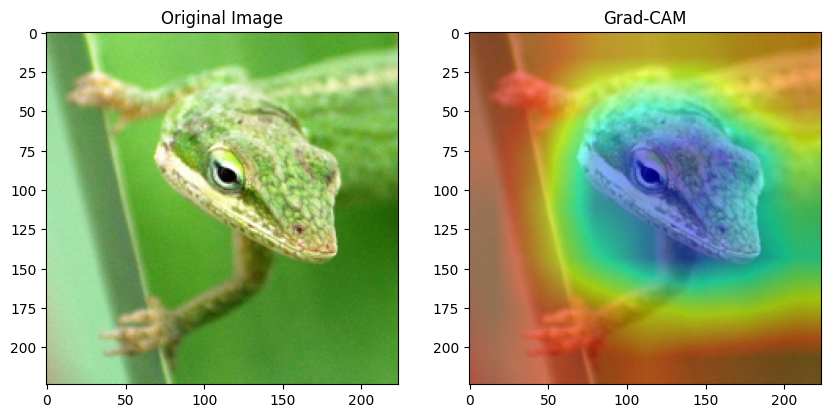

In [1]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def preprocess_image(image_path, input_size):
    preprocess = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert("RGB")
    return preprocess(image).unsqueeze(0)

def show_cam_on_image(image, mask):
    # Ensure the mask is 2D and resize it to match the image dimensions
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(image)
    cam = cam / np.max(cam)  # Normalize
    return np.uint8(255 * cam)

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None

        target_layer.register_forward_hook(self.save_features)
        target_layer.register_backward_hook(self.save_gradients)

    def save_features(self, module, input, output):
        self.features = output

    def save_gradients(self, module, grad_in, grad_out):
        self.gradients = grad_out[0]

    def generate(self, input_tensor, target_class):
        output = self.model(input_tensor)
        self.model.zero_grad()
        target = output[0, target_class]
        target.backward()

        weights = torch.mean(self.gradients, dim=[2, 3], keepdim=True)
        cam = torch.sum(weights * self.features, dim=1, keepdim=True)
        cam = F.relu(cam)
        cam = cam.squeeze().detach().cpu().numpy()
        cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))  # Normalize
        return cam

# Load pre-trained model and image
model = models.resnet50(pretrained=True)
model.eval()
input_size = (224, 224)

# Select target layer
target_layer = model.layer4[2].conv3

# Initialize Grad-CAM
grad_cam = GradCAM(model, target_layer)

# Preprocess input image
image_path = "/kaggle/input/image-lizard/GL - Copy (1).jpeg"  # Replace with your image path
input_tensor = preprocess_image(image_path, input_size)

# Generate Grad-CAM
output = model(input_tensor)
predicted_class = torch.argmax(output).item()
cam = grad_cam.generate(input_tensor, predicted_class)

# Visualize the result
original_image = Image.open(image_path).convert("RGB")
original_image = np.array(original_image.resize(input_size)) / 255.0
cam_image = show_cam_on_image(original_image, cam)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)

plt.subplot(1, 2, 2)
plt.title("Grad-CAM")
plt.imshow(cam_image)
plt.show()

In [2]:
import tensorflow_datasets as tfds

In [3]:
import os
import shutil

# Path to the main folder
main_folder_path = "/kaggle/input/oxford-flower-17categories-labelled/17FlowerOxfordDataset"

# Path to the new dataset folder
new_dataset_path = "/kaggle/working/"

# Create the new dataset folder if it doesn't exist
os.makedirs(new_dataset_path, exist_ok=True)

# Iterate through each subfolder in the main folder
for subfolder in os.scandir(main_folder_path):
    if subfolder.is_dir():  # Check if it's a directory (subfolder)
        # Get the first image file in the subfolder
        first_image = next(os.scandir(subfolder.path))
        if first_image.is_file():  # Check if it's a file (image)
            # Construct the source and destination paths for the image
            source_path = os.path.join(subfolder.path, first_image.name)
            destination_path = os.path.join(new_dataset_path, first_image.name)

            # Copy the first image to the new dataset folder
            shutil.copy2(source_path, destination_path)
            print(f"Copied {first_image.name} to new dataset.")

print("New dataset created successfully.")


Copied image_0270.jpg to new dataset.
Copied image_0677.jpg to new dataset.
Copied image_0073.jpg to new dataset.
Copied image_0491.jpg to new dataset.
Copied image_0340.jpg to new dataset.
Copied image_1103.jpg to new dataset.
Copied image_0946.jpg to new dataset.
Copied image_1168.jpg to new dataset.
Copied image_0866.jpg to new dataset.
Copied image_1340.jpg to new dataset.
Copied image_1266.jpg to new dataset.
Copied image_0755.jpg to new dataset.
Copied image_0612.jpg to new dataset.
Copied image_0178.jpg to new dataset.
Copied image_0454.jpg to new dataset.
New dataset created successfully.


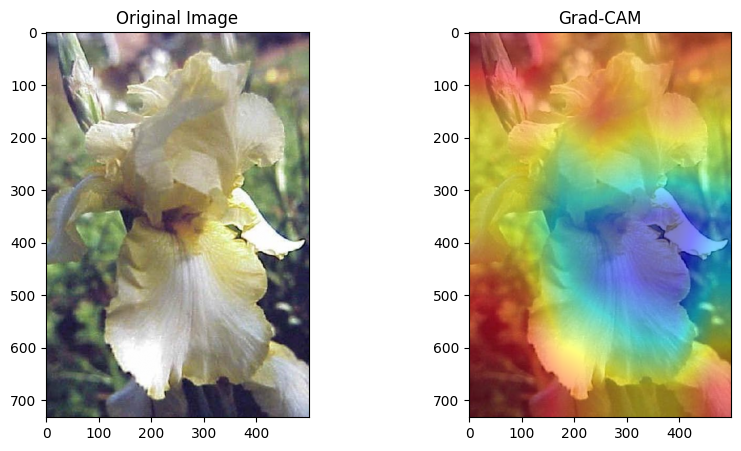

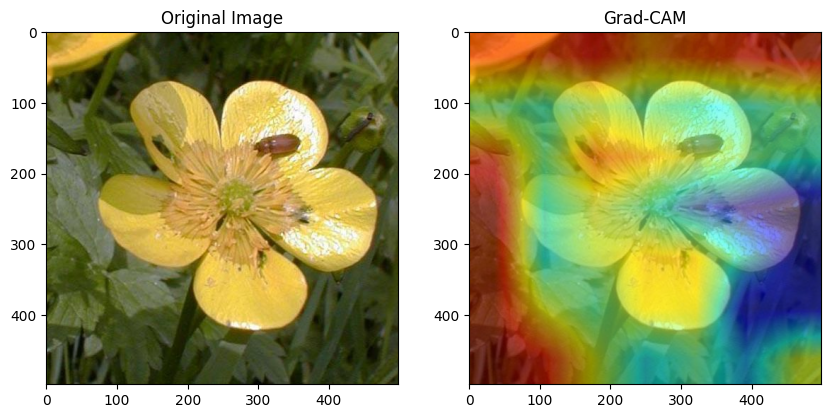

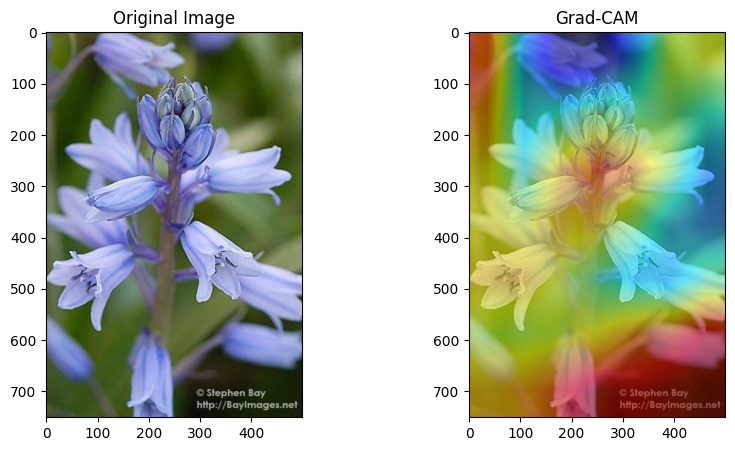

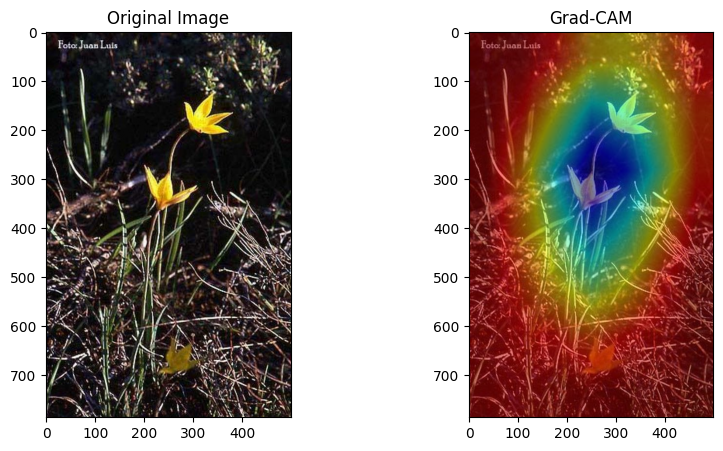

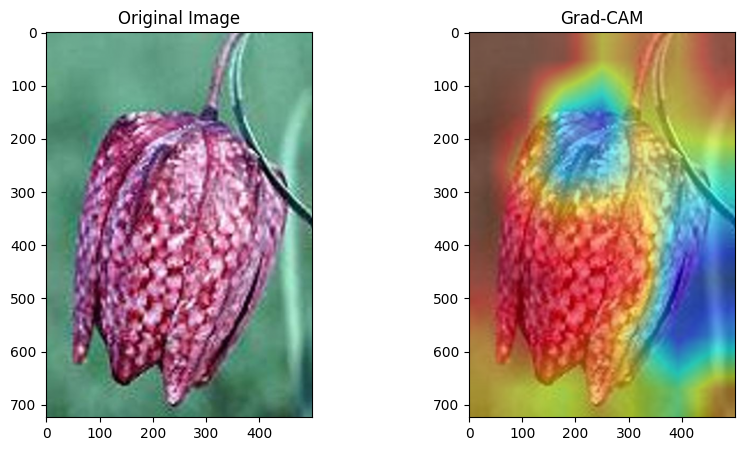

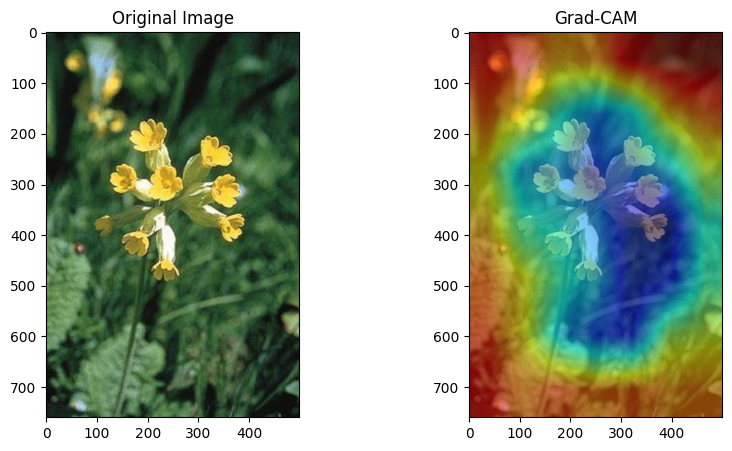

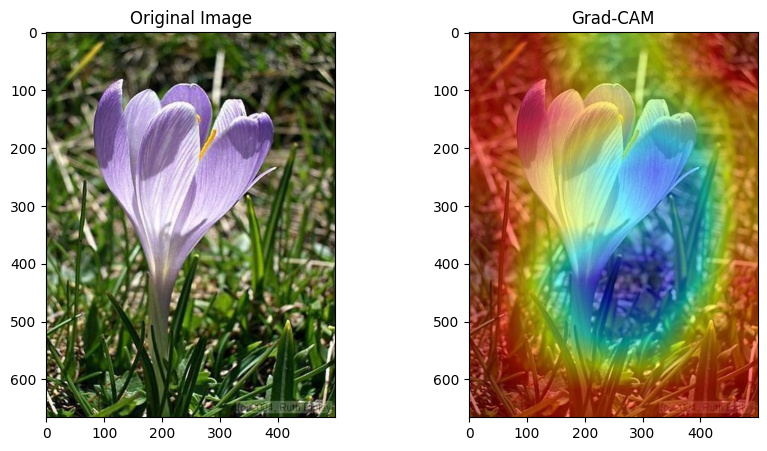

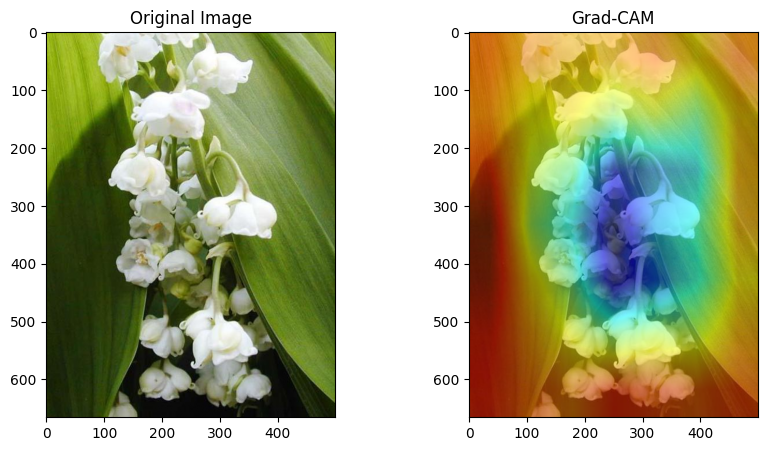

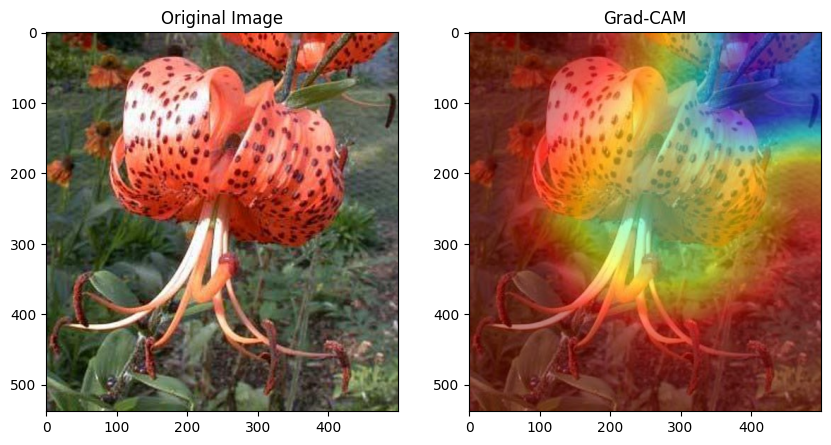

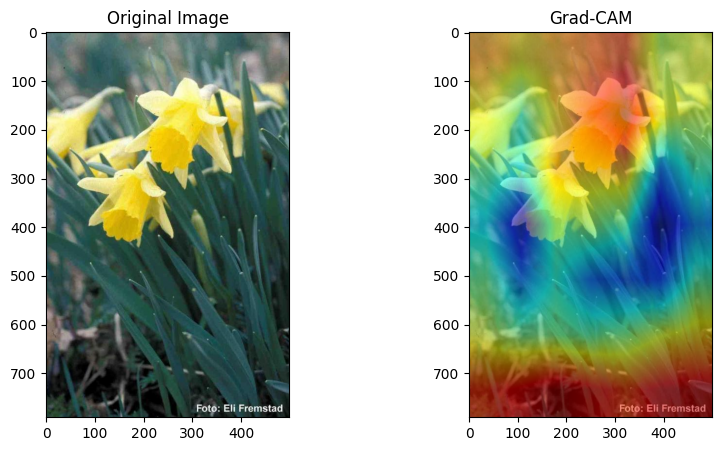

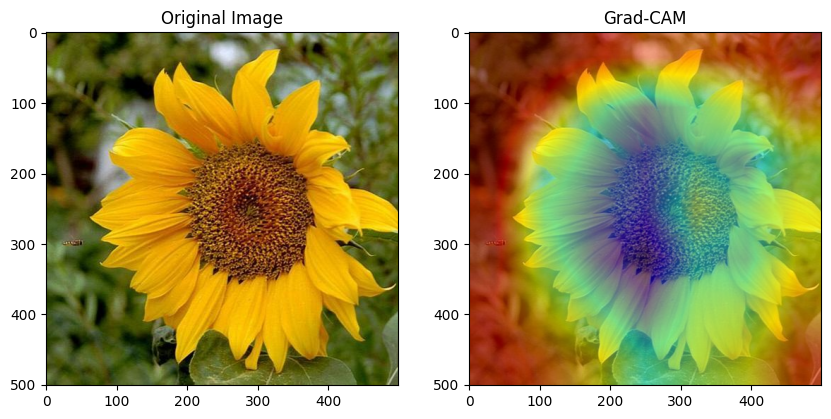

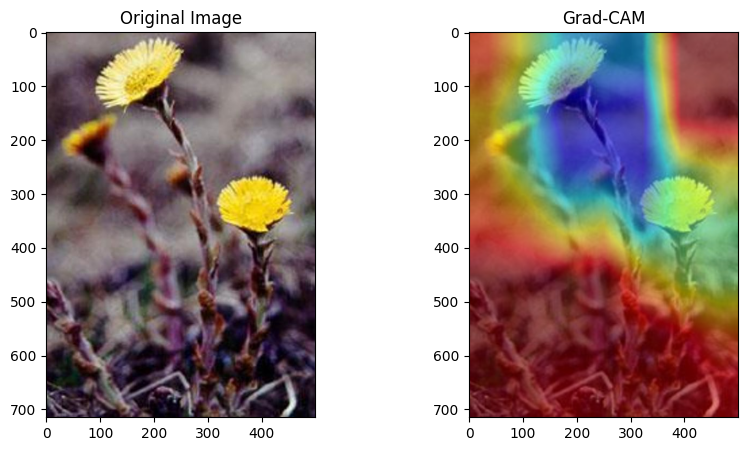

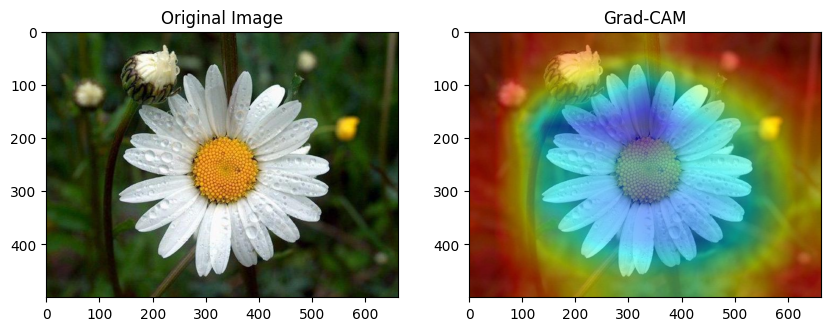

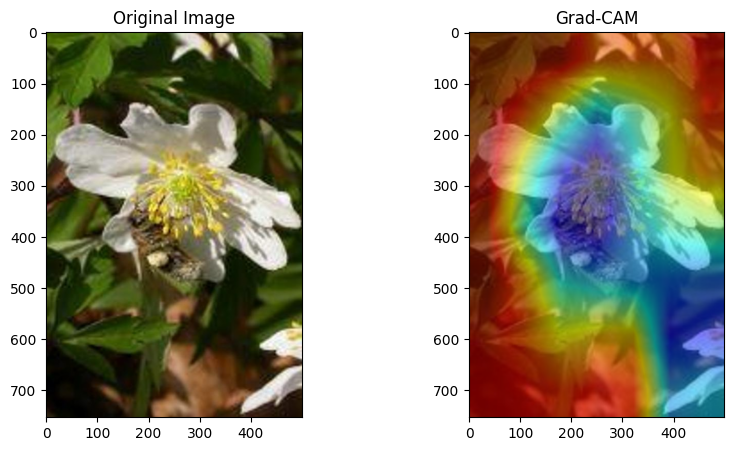

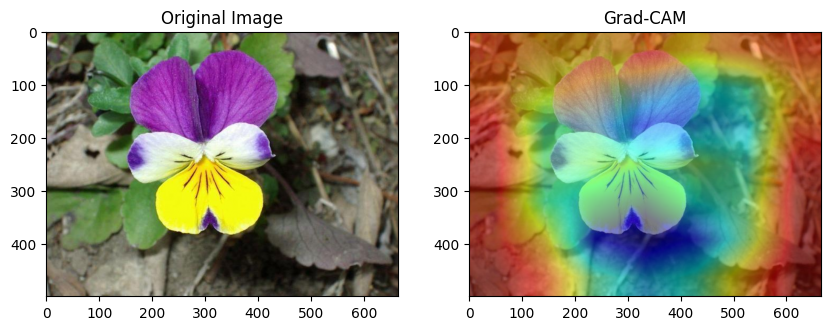

Grad-CAM visualization completed for all images.


In [4]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def preprocess_image(image_path, input_size):
    preprocess = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert("RGB")
    return preprocess(image).unsqueeze(0)

def show_cam_on_image(image, mask):
    # Ensure the mask is 2D and resize it to match the image dimensions
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(image)
    cam = cam / np.max(cam)  # Normalize
    return np.uint8(255 * cam)

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None

        target_layer.register_forward_hook(self.save_features)
        target_layer.register_backward_hook(self.save_gradients)

    def save_features(self, module, input, output):
        self.features = output

    def save_gradients(self, module, grad_in, grad_out):
        self.gradients = grad_out[0]

    def generate(self, input_tensor, target_class):
        output = self.model(input_tensor)
        self.model.zero_grad()
        target = output[0, target_class]
        target.backward()

        weights = torch.mean(self.gradients, dim=[2, 3], keepdim=True)
        cam = torch.sum(weights * self.features, dim=1, keepdim=True)
        cam = F.relu(cam)
        cam = cam.squeeze().detach().cpu().numpy()
        cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))  # Normalize
        return cam

# Load pre-trained model and image
model = models.resnet50(pretrained=True)
model.eval()
input_size = (224, 224)

# Select target layer
target_layer = model.layer4[2].conv3

# Initialize Grad-CAM
grad_cam = GradCAM(model, target_layer)

dataset_path ='/kaggle/working/'
# Iterate through each image in the dataset folder
for image_name in os.listdir(dataset_path):
    if image_name.endswith(".jpg") or image_name.endswith(".png"):  # Adjust as per your image formats
        image_path = os.path.join(dataset_path, image_name)
        input_tensor = preprocess_image(image_path, input_size)
        #input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension

        # Generate Grad-CAM
        output = model(input_tensor)
        predicted_class = torch.argmax(output).item()
        cam = grad_cam.generate(input_tensor, predicted_class)

        # Visualize the result
        original_image = np.array(Image.open(image_path).convert("RGB")) / 255.0
        cam_image = show_cam_on_image(original_image, cam)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(original_image)

        plt.subplot(1, 2, 2)
        plt.title("Grad-CAM")
        plt.imshow(cam_image)
        plt.show()

print("Grad-CAM visualization completed for all images.")